# US02 PROJECT

For this project we are working on articles and more precisely on 1200 summmaries of articles of the website : https://wasteadvantagemag.com

The major goal is to find thanks to summaries which article could be the most interesting if you work and would like to find some data about plastic waste, organic waste, ...

The goals of this code are :
- Create a graph of the most frequent words in our summaries
- Create a Excel file and a data frame on Python to classify : the title, the summary, the link, the category, the words occurrences in summaries of categories such as waste, organic, recyclable, ... A category will be composed of words which are synonyms or can create a category by themselves.
- Find the article associated to the summary which contains for example the most occurrences of the category "organic"
- Apply Word2Vec in order to create vectors of words and obtain a graph on Gephi
- Apply a machine learning method called LDA thanks to TFIDF and BagofWords to create some topics and predict in which topic, articles which are not in the training set (allows us to build our model) but in the test set are

## Import useful librairies

In [1]:
import requests
import nltk
import random
import time
from collections import Counter
from bs4 import BeautifulSoup
import pandas as pd
import os
import time
from pprint import pprint

## Recover articles from pages

In [354]:
source = []
article = []
soup = []

In [355]:
for i in range(0, 100):
    
    url = requests.get('https://wasteadvantagemag.com/news-archive/page/' + str(i+1)).text
    source.append(url)
    
    try:
        soup.append(BeautifulSoup(source[i], 'html5lib'))

        article.append(soup[i].find_all('div', 'span_8 mobile_9 pad'))
        
        with open("articlesforproject/page_" + str(i), 'w') as fp: #penser à modifier ou cleaner le dossier
            fp.write(str(article[i]))
            
        print("article number " + str(i) + " done.")
        
        time.sleep(0.2)
    except :
        print("error download")
        #print(i, " ", url)

article number 0 done.
article number 1 done.
article number 2 done.
article number 3 done.
article number 4 done.
article number 5 done.
article number 6 done.
article number 7 done.
article number 8 done.
article number 9 done.
article number 10 done.
article number 11 done.
article number 12 done.
article number 13 done.
article number 14 done.
article number 15 done.
article number 16 done.
article number 17 done.
article number 18 done.
article number 19 done.
article number 20 done.
article number 21 done.
article number 22 done.
article number 23 done.
article number 24 done.
article number 25 done.
article number 26 done.
article number 27 done.
article number 28 done.
article number 29 done.
article number 30 done.
article number 31 done.
article number 32 done.
article number 33 done.
article number 34 done.
article number 35 done.
article number 36 done.
article number 37 done.
article number 38 done.
error download
article number 40 done.
article number 41 done.
article num

In [288]:
print(len(soup))
print(len(article))

591
10


In [289]:
n_articles_downloaded = len(os.listdir(path='articlesforproject/'))
article_fp = ""
soup = []
for i in range(0, n_articles_downloaded):
    with open("articlesforproject/page_" + str(i), 'r') as fp:
        soup.append(BeautifulSoup(fp.read(), 'html5lib'))

## Other downloading method

In [242]:
source = []
article = []
soup = []
for i in range(100):
    url = requests.get('https://wasteadvantagemag.com/news-archive/page/' + str(i+1)).text
    source.append(url)

    soup.append(BeautifulSoup(source[i], 'html5lib'))

    article.append(soup[i].find_all('div', 'span_8 mobile_9 pad'))
    time.sleep(0.35)
    
    print("page number " + str(i) + " done :)")

print(len(article))

page number 0 done :)
page number 1 done :)
page number 2 done :)
page number 3 done :)
page number 4 done :)
page number 5 done :)
page number 6 done :)
page number 7 done :)
page number 8 done :)
page number 9 done :)
page number 10 done :)
page number 11 done :)
page number 12 done :)
page number 13 done :)
page number 14 done :)
page number 15 done :)
page number 16 done :)
page number 17 done :)
page number 18 done :)
page number 19 done :)
page number 20 done :)
page number 21 done :)
page number 22 done :)
page number 23 done :)
page number 24 done :)
page number 25 done :)
page number 26 done :)
page number 27 done :)
page number 28 done :)
page number 29 done :)
page number 30 done :)
page number 31 done :)
page number 32 done :)
page number 33 done :)
page number 34 done :)
page number 35 done :)
page number 36 done :)
page number 37 done :)
page number 38 done :)
page number 39 done :)
page number 40 done :)
page number 41 done :)
page number 42 done :)
page number 43 done :

# Recover summaries, titles, links, categories, dates
## Summary

In [243]:
def get_list_article_name(soup):
    summary_list = []
    for each in soup:
        first_step_summary = each.find_all('div', 'span_8 mobile_9 pad')
        for each in first_step_summary:
            second_step_summary = each.find_all('p')
            for each in second_step_summary:
                third_step_summary = each.find_all('a')
                for articlesummary in third_step_summary:
                    summary_test = articlesummary.contents[0]
                    summary = str(summary_test).replace('\xa0',' ')
                    summary_list.append(summary)
    return summary_list

summary_list = get_list_article_name(soup)
print(summary_list[0:3])
print(len(summary_list))

summarylist = []
for each in summary_list:
    summarylist.append(each.lower())
summarylist = list(summarylist)
print(len(summarylist))
summarylist[0:3]

['Before the manufacturing process of glass was discovered, the ancient man used naturally occurring glass popularly known as obsidian or volcanic glass. Volcanic glass was used to make knives, jewelry, arrowheads and even money. Pliny, a Roman historian reported that glass was made in first made in Syria around 5000BC. In the following three hundred years, […]', 'Pittsburgh Mayor Bill Peduto unveiled plans to provide thousands more blue recycling bins to city residents in an effort to meet zero waste goals. “As the recycling industry and our climate continue to change, Pittsburgh needs to keep adapting to a stronger culture of waste reduction and material reuse,” Mayor Peduto said. “A strategic plan […]', 'The quantity of waste produced and how park visitors dispose of it (recycling some materials) is a growing concern for park managers. Handling park waste costs money, involves significant effort, and requires human and natural resources that tax parks to the extreme. And with number

['before the manufacturing process of glass was discovered, the ancient man used naturally occurring glass popularly known as obsidian or volcanic glass. volcanic glass was used to make knives, jewelry, arrowheads and even money. pliny, a roman historian reported that glass was made in first made in syria around 5000bc. in the following three hundred years, […]',
 'pittsburgh mayor bill peduto unveiled plans to provide thousands more blue recycling bins to city residents in an effort to meet zero waste goals. “as the recycling industry and our climate continue to change, pittsburgh needs to keep adapting to a stronger culture of waste reduction and material reuse,” mayor peduto said. “a strategic plan […]',
 'the quantity of waste produced and how park visitors dispose of it (recycling some materials) is a growing concern for park managers. handling park waste costs money, involves significant effort, and requires human and natural resources that tax parks to the extreme. and with numb

### Number the dictionary
Not now a useful part below, just to see in which summary are some words, but it will be useful after

In [244]:
number_word = {}
c = 0
for each in summarylist:
    number_word[each] = c
    c += 1

print(len(number_word))
#number_word

1199


### Test : show in which summary the word ... is 

In [245]:
word_presence = [val  for (k, val) in number_word.items() if not k.find('waste') == -1]
print(word_presence[:10])

[1, 2, 6, 9, 14, 15, 21, 23, 27, 28]


## Title

In [246]:
def get_list_article_name(soup):
    titlelist = []
    for each in soup:
        feed_title = each.find_all('div', 'span_8 mobile_9 pad')
        for eachs in feed_title:
            debut = eachs.find_all('h3')
            for article in debut:
                a = article.find_all('a')
                for articletitle in a:
                    title = articletitle.contents[0]
                    titlelist.append(title)
    return titlelist
titlelist = get_list_article_name(soup)
print(len(titlelist))
titlelist[:10]

1200


['Commentary: Glass Recycling You Should Know: The Most Important Material in the History of Mankind',
 'Pittsburgh, PA Mayor Bill Peduto Proposes Recycling Expansion Plan',
 'National Trash: Reducing Waste Produced in U.S. National Parks',
 'AMP Robotics Announces Largest Deployment of AI Guided Robots for the Recycling Industry',
 'Lakeshore Recycling Systems Named Fastest Growing Company by Crain’s Chicago Business',
 'California Inches Closer To Banning Sale And Manufacture Of Single-Use Plastics',
 'SWANA Supports California Lithium-Ion Battery Fire Prevention Act',
 'Plastics Makers Welcome the Introduction of Save of Seas Act 2.0',
 'National CleanUp Day Announces Return on September 2',
 'Sebastopol, CA Bans Styrofoam Food Containers Amid Growing Alarm About Single-Use Plastics']

## Link

In [247]:
def get_list_article_name(soup):
    linklist = []
    for each in soup:
        feed_title = each.find_all('div', 'span_8 mobile_9 pad')
        for eachs in feed_title:
            debut = eachs.find_all('h3')
            for article in debut:
                a = article.find_all('a')
                for articletitle in a:
                    link = articletitle.get('href')
                    linklist.append(link)
    return linklist
linklist = get_list_article_name(soup)
print(len(linklist))
linklist[:10]

1200


['https://wasteadvantagemag.com/commentary-glass-recycling-you-should-know-the-most-important-material-in-the-history-of-mankind/',
 'https://wasteadvantagemag.com/pittsburgh-pa-mayor-bill-peduto-proposes-recycling-expansion-plan/',
 'https://wasteadvantagemag.com/national-trash-reducing-waste-produced-in-u-s-national-parks/',
 'https://wasteadvantagemag.com/amp-robotics-announces-largest-deployment-of-ai-guided-robots-for-the-recycling-industry/',
 'https://wasteadvantagemag.com/lakeshore-recycling-systems-named-fastest-growing-company-by-crains-chicago-business/',
 'https://wasteadvantagemag.com/california-inches-closer-to-banning-sale-and-manufacture-of-single-use-plastics/',
 'https://wasteadvantagemag.com/swana-supports-california-lithium-ion-battery-fire-prevention-act/',
 'https://wasteadvantagemag.com/plastics-makers-welcome-the-introduction-of-save-of-seas-act-2-0/',
 'https://wasteadvantagemag.com/national-cleanup-day-announces-return-on-september-2/',
 'https://wasteadvantag

## Category

In [249]:
def get_list_article_name(soup):
    categorylist = []
    for each in soup:
        feed_title = each.find_all('div', 'span_8 mobile_9 pad')
        for eachs in feed_title:
            debut = eachs.find_all('span', 'desktop meta')
            for article in debut:
                a = article.find_all('b')
                for alex in a:
                    b = alex.find_all('a')
                    for articletitle in b:
                        category = articletitle.contents[0]
                    categorylist.append(category)
    return categorylist
categorylist = get_list_article_name(soup)
print(len(categorylist))
categorylist[:10]

1200


['Newsletter Headline',
 'Newsletter Headline',
 'Newsletter Headline',
 'News and Press',
 'Collection/Transfer',
 'Government and Regulations',
 'Collection/Transfer',
 'Government and Regulations',
 'News and Press',
 'News and Press']

## Date

In [250]:
def get_list_article_name(soup):
    datelist = []
    for each in soup:
        feed_title = each.find_all('div', 'span_8 mobile_9 pad')
        for eachs in feed_title:
            debut = eachs.find_all('span', 'desktop meta')
            for article in debut:
                a = article.find_all('time')
                for articletitle in a:
                    date = articletitle.contents[0]
                datelist.append(date)
    return datelist
datelist = get_list_article_name(soup)
print(len(datelist))
datelist[:10]

1200


['June 28, 2019',
 'June 28, 2019',
 'June 28, 2019',
 'June 28, 2019',
 'June 28, 2019',
 'June 28, 2019',
 'June 27, 2019',
 'June 27, 2019',
 'June 27, 2019',
 'June 25, 2019']

Now we have our summaries, titles, links, categories and dates

## Clean the summarylist

### Tokenize

In [251]:
def get_list_tokens(summarylist):
    tokensummarylist = []
    for summary in summarylist:
        tokens = nltk.word_tokenize(summary)
        tags = nltk.pos_tag(tokens)
               
        for tag in tags :
            if tag[1] == 'NN' or tag[1] == 'NNPS' or tag[1] == 'NNS' or tag[1] == 'NNP':
                tokensummarylist.append(str(tag[0]))
    return tokensummarylist
tokensummarylist = get_list_tokens(summarylist)
print(tokensummarylist[:50])

['manufacturing', 'process', 'glass', 'ancient', 'man', 'glass', 'glass', 'glass', 'knives', 'jewelry', 'arrowheads', 'money', 'pliny', 'roman', 'historian', 'glass', 'syria', 'years', '[', '…', ']', 'pittsburgh', 'mayor', 'bill', 'peduto', 'plans', 'thousands', 'bins', 'city', 'residents', 'effort', 'waste', 'goals', 'recycling', 'industry', 'climate', 'continue', 'needs', 'culture', 'waste', 'reduction', 'material', 'reuse', '”', 'mayor', 'peduto', 'plan', '[', '…', ']']


### Lemmatize

In [252]:
from nltk.stem import WordNetLemmatizer

In [253]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [255]:
def get_list_lemmatize(tokensummarylist):
    lemmatizesummarylist = []
    
    for words in tokensummarylist:
        wordnet_lemmatizer = WordNetLemmatizer()
        each = wordnet_lemmatizer.lemmatize(words)
        lemmatizesummarylist.append(each)

    return lemmatizesummarylist

lemmatizesummarylist = get_list_lemmatize(tokensummarylist)

print(lemmatizesummarylist[:100])

['manufacturing', 'process', 'glass', 'ancient', 'man', 'glass', 'glass', 'glass', 'knife', 'jewelry', 'arrowhead', 'money', 'pliny', 'roman', 'historian', 'glass', 'syria', 'year', '[', '…', ']', 'pittsburgh', 'mayor', 'bill', 'peduto', 'plan', 'thousand', 'bin', 'city', 'resident', 'effort', 'waste', 'goal', 'recycling', 'industry', 'climate', 'continue', 'need', 'culture', 'waste', 'reduction', 'material', 'reuse', '”', 'mayor', 'peduto', 'plan', '[', '…', ']', 'quantity', 'waste', 'visitor', 'material', 'concern', 'park', 'manager', 'waste', 'cost', 'money', 'effort', 'resource', 'tax', 'park', 'extreme', 'number', 'visitor', 'manager', 'strategy', '[', '…', ']', 'robotics', 'corp.', 'amp', 'expansion', 'robot', 'msw', 'stream', 'recyclers', 'ssr', '’', 's', 'unveiling', 'installation', 'system', 'mrf', 'florida', 'kind', 'state', 'ssr', 'system', 'sr', '[', '…', ']', 'system', 'lr', '’', 's']


## Last step of cleaning

In [256]:
new_list = []
for each in summarylist:
    new_list.append([])
    new_list[-1] = each.replace('[…]', '').replace('.', '').split(' ') 
    new_list[-1] = [i for i in new_list[-1] if len(i) > 2]
print(len(new_list[0]))
print(new_list[0])

48
['before', 'the', 'manufacturing', 'process', 'glass', 'was', 'discovered,', 'the', 'ancient', 'man', 'used', 'naturally', 'occurring', 'glass', 'popularly', 'known', 'obsidian', 'volcanic', 'glass', 'volcanic', 'glass', 'was', 'used', 'make', 'knives,', 'jewelry,', 'arrowheads', 'and', 'even', 'money', 'pliny,', 'roman', 'historian', 'reported', 'that', 'glass', 'was', 'made', 'first', 'made', 'syria', 'around', '5000bc', 'the', 'following', 'three', 'hundred', 'years,']


In [257]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [258]:
from nltk.corpus import stopwords

In [259]:
stopWords = set(stopwords.words('english'))

In [260]:
summarylist_join = ":".join(lemmatizesummarylist)

In [261]:
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(summarylist_join)
wordsFiltered = []
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
print(wordsFiltered[0:80])
print(len(wordsFiltered))

['manufacturing', ':', 'process', ':', 'glass', ':', 'ancient', ':', 'man', ':', 'glass', ':', 'glass', ':', 'glass', ':', 'knife', ':', 'jewelry', ':', 'arrowhead', ':', 'money', ':', 'pliny', ':', 'roman', ':', 'historian', ':', 'glass', ':', 'syria', ':', 'year', ':', '[', ':', '…', ':', ']', ':', 'pittsburgh', ':', 'mayor', ':', 'bill', ':', 'peduto', ':', 'plan', ':', 'thousand', ':', 'bin', ':', 'city', ':', 'resident', ':', 'effort', ':', 'waste', ':', 'goal', ':', 'recycling', ':', 'industry', ':', 'climate', ':', 'continue', ':', 'need', ':', 'culture', ':', 'waste', ':']
55019


In [262]:
words_filtered_list = [[]]
for each in wordsFiltered:
    if each == ']':
        words_filtered_list.append([])
    words_filtered_list[-1].append(each)
del words_filtered_list[-1]

new_list_clean = []
for each in words_filtered_list:
    new_list_clean.append([])
    for v in each:
        if len(v) > 1:
            new_list_clean[-1].append(v)

print(len(new_list_clean))
print(new_list_clean[:10])

1195
[['manufacturing', 'process', 'glass', 'ancient', 'man', 'glass', 'glass', 'glass', 'knife', 'jewelry', 'arrowhead', 'money', 'pliny', 'roman', 'historian', 'glass', 'syria', 'year'], ['pittsburgh', 'mayor', 'bill', 'peduto', 'plan', 'thousand', 'bin', 'city', 'resident', 'effort', 'waste', 'goal', 'recycling', 'industry', 'climate', 'continue', 'need', 'culture', 'waste', 'reduction', 'material', 'reuse', 'mayor', 'peduto', 'plan'], ['quantity', 'waste', 'visitor', 'material', 'concern', 'park', 'manager', 'waste', 'cost', 'money', 'effort', 'resource', 'tax', 'park', 'extreme', 'number', 'visitor', 'manager', 'strategy'], ['robotics', 'corp.', 'amp', 'expansion', 'robot', 'msw', 'stream', 'recyclers', 'ssr', 'unveiling', 'installation', 'system', 'mrf', 'florida', 'kind', 'state', 'ssr', 'system', 'sr'], ['system', 'lr', 'company', 'crain', 'announcement', 'friday', 'june', 'crain', 'award', 'luncheon', 'ranking', 'region', 'company', 'business', 'strategy', 'revenue', 'growth',

## Show the most common words

In [263]:
new_list_clean1 = []
for each in new_list_clean:
    for i in each:
            new_list_clean1.append(i)
print(len(new_list_clean1))
print(new_list_clean1[0:100])

23378
['manufacturing', 'process', 'glass', 'ancient', 'man', 'glass', 'glass', 'glass', 'knife', 'jewelry', 'arrowhead', 'money', 'pliny', 'roman', 'historian', 'glass', 'syria', 'year', 'pittsburgh', 'mayor', 'bill', 'peduto', 'plan', 'thousand', 'bin', 'city', 'resident', 'effort', 'waste', 'goal', 'recycling', 'industry', 'climate', 'continue', 'need', 'culture', 'waste', 'reduction', 'material', 'reuse', 'mayor', 'peduto', 'plan', 'quantity', 'waste', 'visitor', 'material', 'concern', 'park', 'manager', 'waste', 'cost', 'money', 'effort', 'resource', 'tax', 'park', 'extreme', 'number', 'visitor', 'manager', 'strategy', 'robotics', 'corp.', 'amp', 'expansion', 'robot', 'msw', 'stream', 'recyclers', 'ssr', 'unveiling', 'installation', 'system', 'mrf', 'florida', 'kind', 'state', 'ssr', 'system', 'sr', 'system', 'lr', 'company', 'crain', 'announcement', 'friday', 'june', 'crain', 'award', 'luncheon', 'ranking', 'region', 'company', 'business', 'strategy', 'revenue', 'growth', 'lakesh

In [264]:
texte = ' '.join(new_list_clean1)
list_words = set()
for each in new_list_clean1:
    list_words.add(each.lower())
list_words = list(list_words)

print(len(list_words))
print(list_words[0:50])

4557
['shortage', 'pressure', 'longer', 'pulp', 'metro', 'allison', 'smartphones', 'whoosh', 'lee', 'renewables', 'sensor', 'loveland', 'pa', 'art', 'rico', 'event', 'improvement', 'delta', 'reader', 'digestate', 'asbestos', 'recall', 'northwoods', 'aspire', 'cunningham', 'bolger', 'proposal', 'weinberger', 'judy', 'facility', 'greensboro', 'frigid', 'amuref', 'grandfather', 'landmark', 'census', 'reshaping', 'recognition', 'violation', 'celebrate', 'release', 'payne', 'accounting', 'roundtable', 'shutdown', 'teach', 'sharon', 'damage', 'gridlock', 'formula']


In [265]:
from collections import Counter
number_word = Counter(new_list_clean1)
number_word_sorted_summary = [(l,k) for k,l in sorted([(j,i) for i,j in number_word.items()], reverse=True)]
number_word_sorted_summary[:20]

[('waste', 755),
 ('year', 288),
 ('city', 262),
 ('company', 252),
 ('plastic', 249),
 ('industry', 196),
 ('state', 189),
 ('service', 185),
 ('program', 179),
 ('recycling', 174),
 ('business', 171),
 ('food', 158),
 ('management', 156),
 ('county', 145),
 ('material', 141),
 ('truck', 123),
 ('landfill', 123),
 ('facility', 119),
 ('market', 113),
 ('technology', 95)]

In [267]:
list_top_words = [each for each in number_word_sorted_summary if each[1] >= 150]
list_top_words

[('waste', 755),
 ('year', 288),
 ('city', 262),
 ('company', 252),
 ('plastic', 249),
 ('industry', 196),
 ('state', 189),
 ('service', 185),
 ('program', 179),
 ('recycling', 174),
 ('business', 171),
 ('food', 158),
 ('management', 156)]

## Plot the graph

In [268]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [269]:
df = pd.DataFrame(data = list_top_words)
df.columns = ['Words', 'Occurrences']

In [270]:
df1 = df[['Occurrences', 'Words']].groupby('Words').mean()
occurrences = df1.sort_values(by='Occurrences', ascending=0)
occurrences

,Occurrences
Words,
waste,755
year,288
city,262
company,252
plastic,249
industry,196
state,189
service,185
program,179


<BarContainer object of 13 artists>

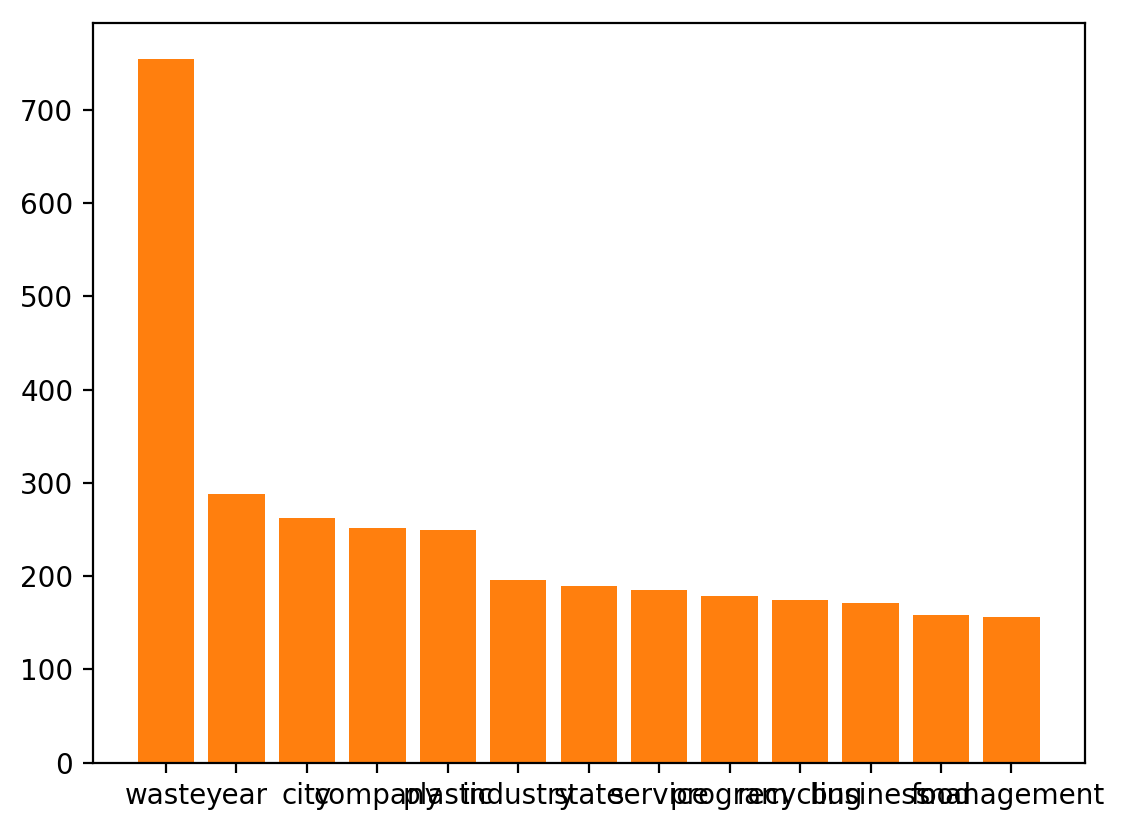

In [271]:
plt.bar(x=np.arange(occurrences.size), height=occurrences['Occurrences'])

plt.rcdefaults()

#plt.bar(x=np.arange(occurrences.size), height=occurrences['Occurrences'])

plt.bar(x=np.arange(occurrences.size), height=occurrences['Occurrences'], tick_label=occurrences.index)

In [272]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

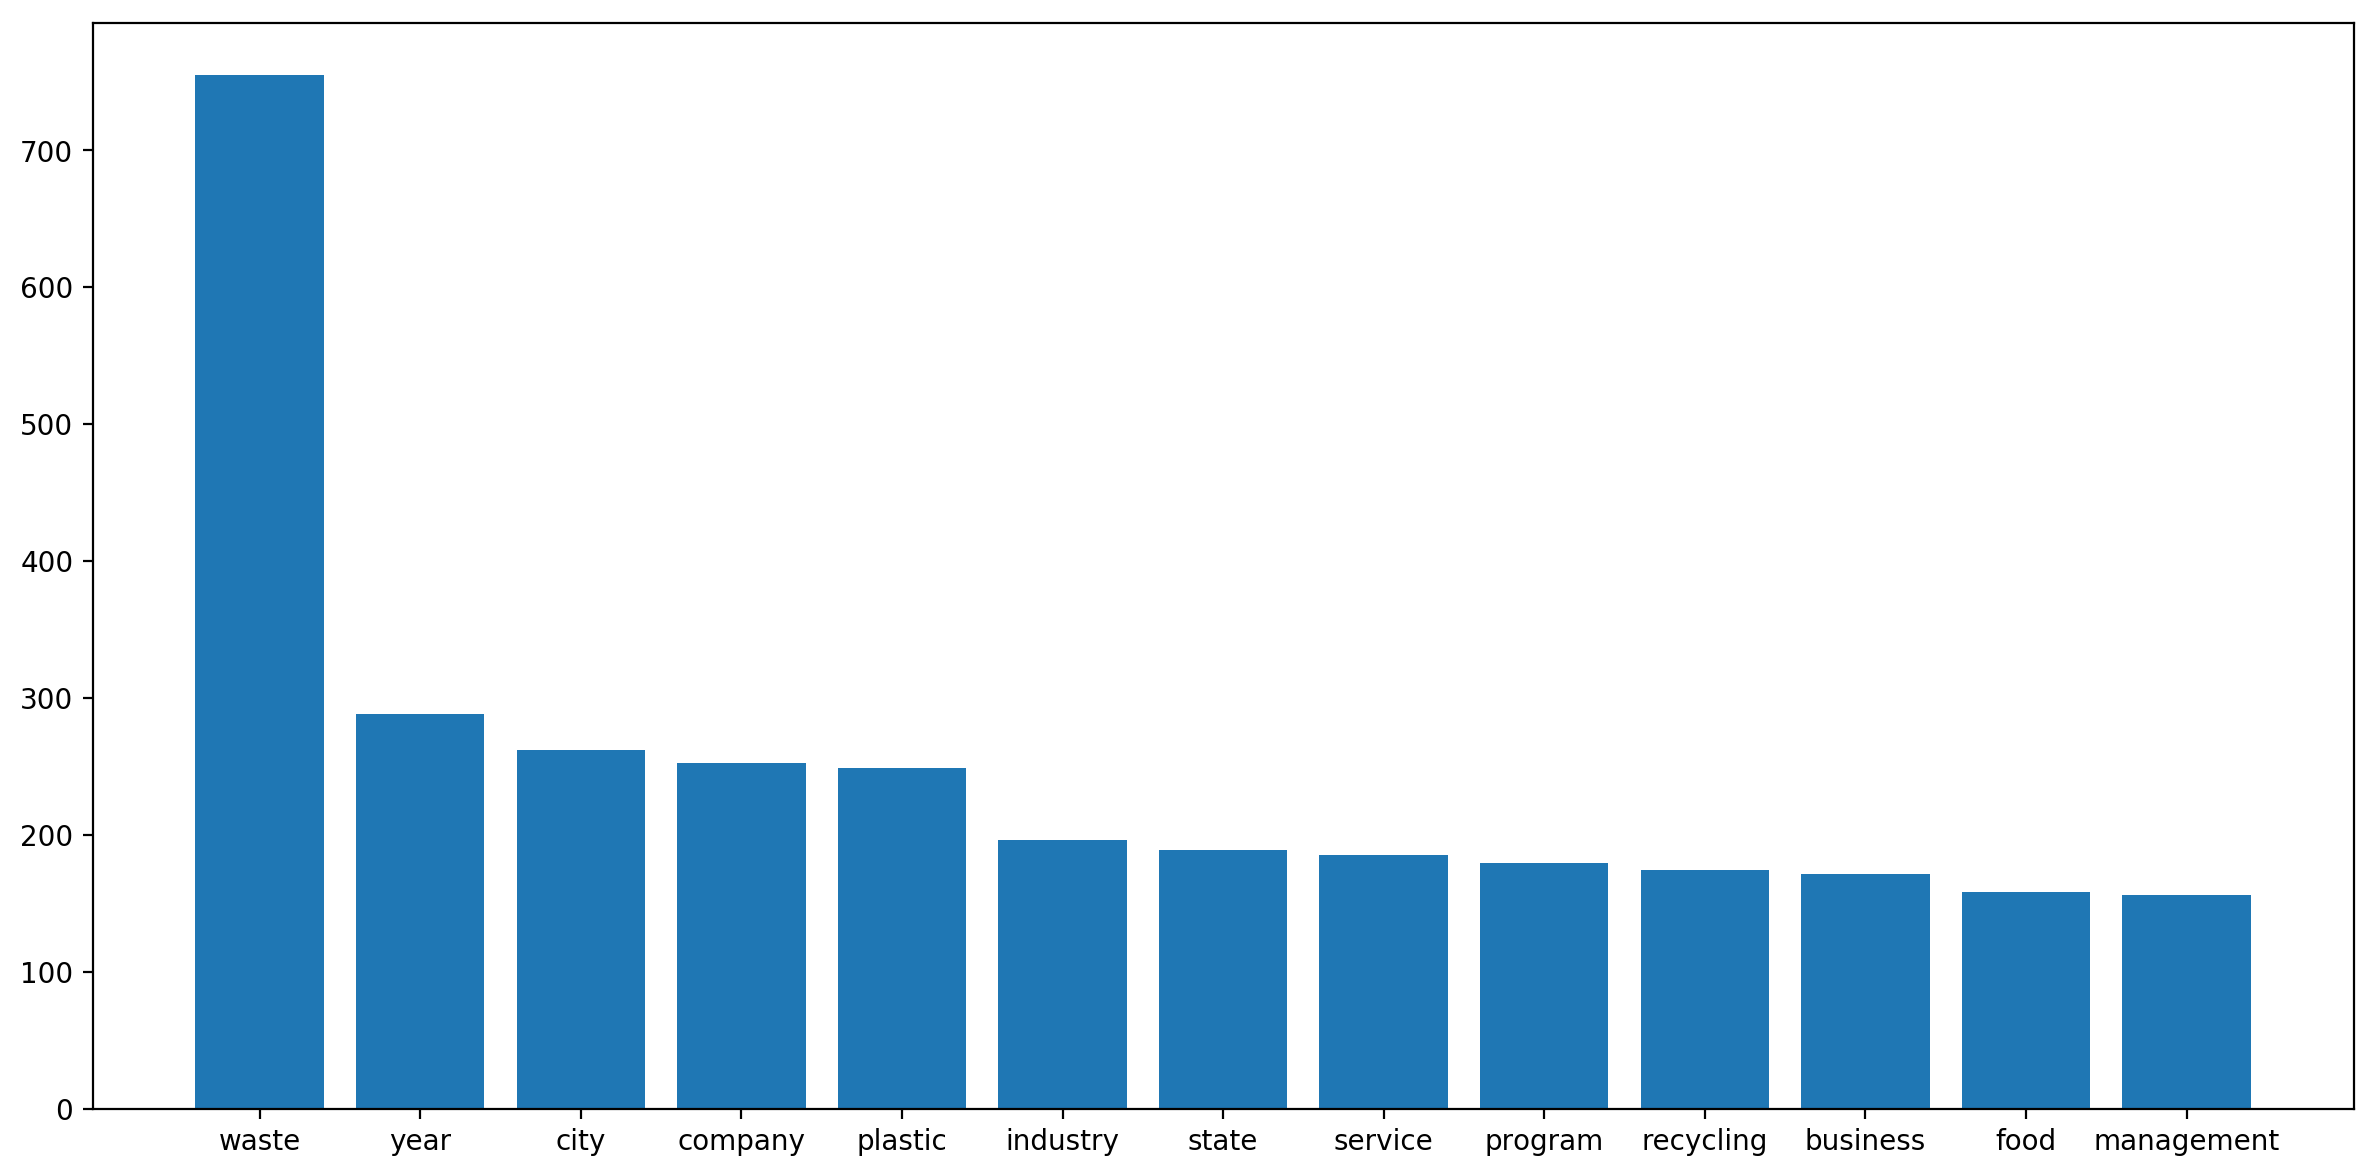

In [273]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()

ax.bar(x=np.arange(occurrences.size), height=occurrences['Occurrences'], tick_label=occurrences.index)

# Make the chart fill out the figure better.
fig.tight_layout()

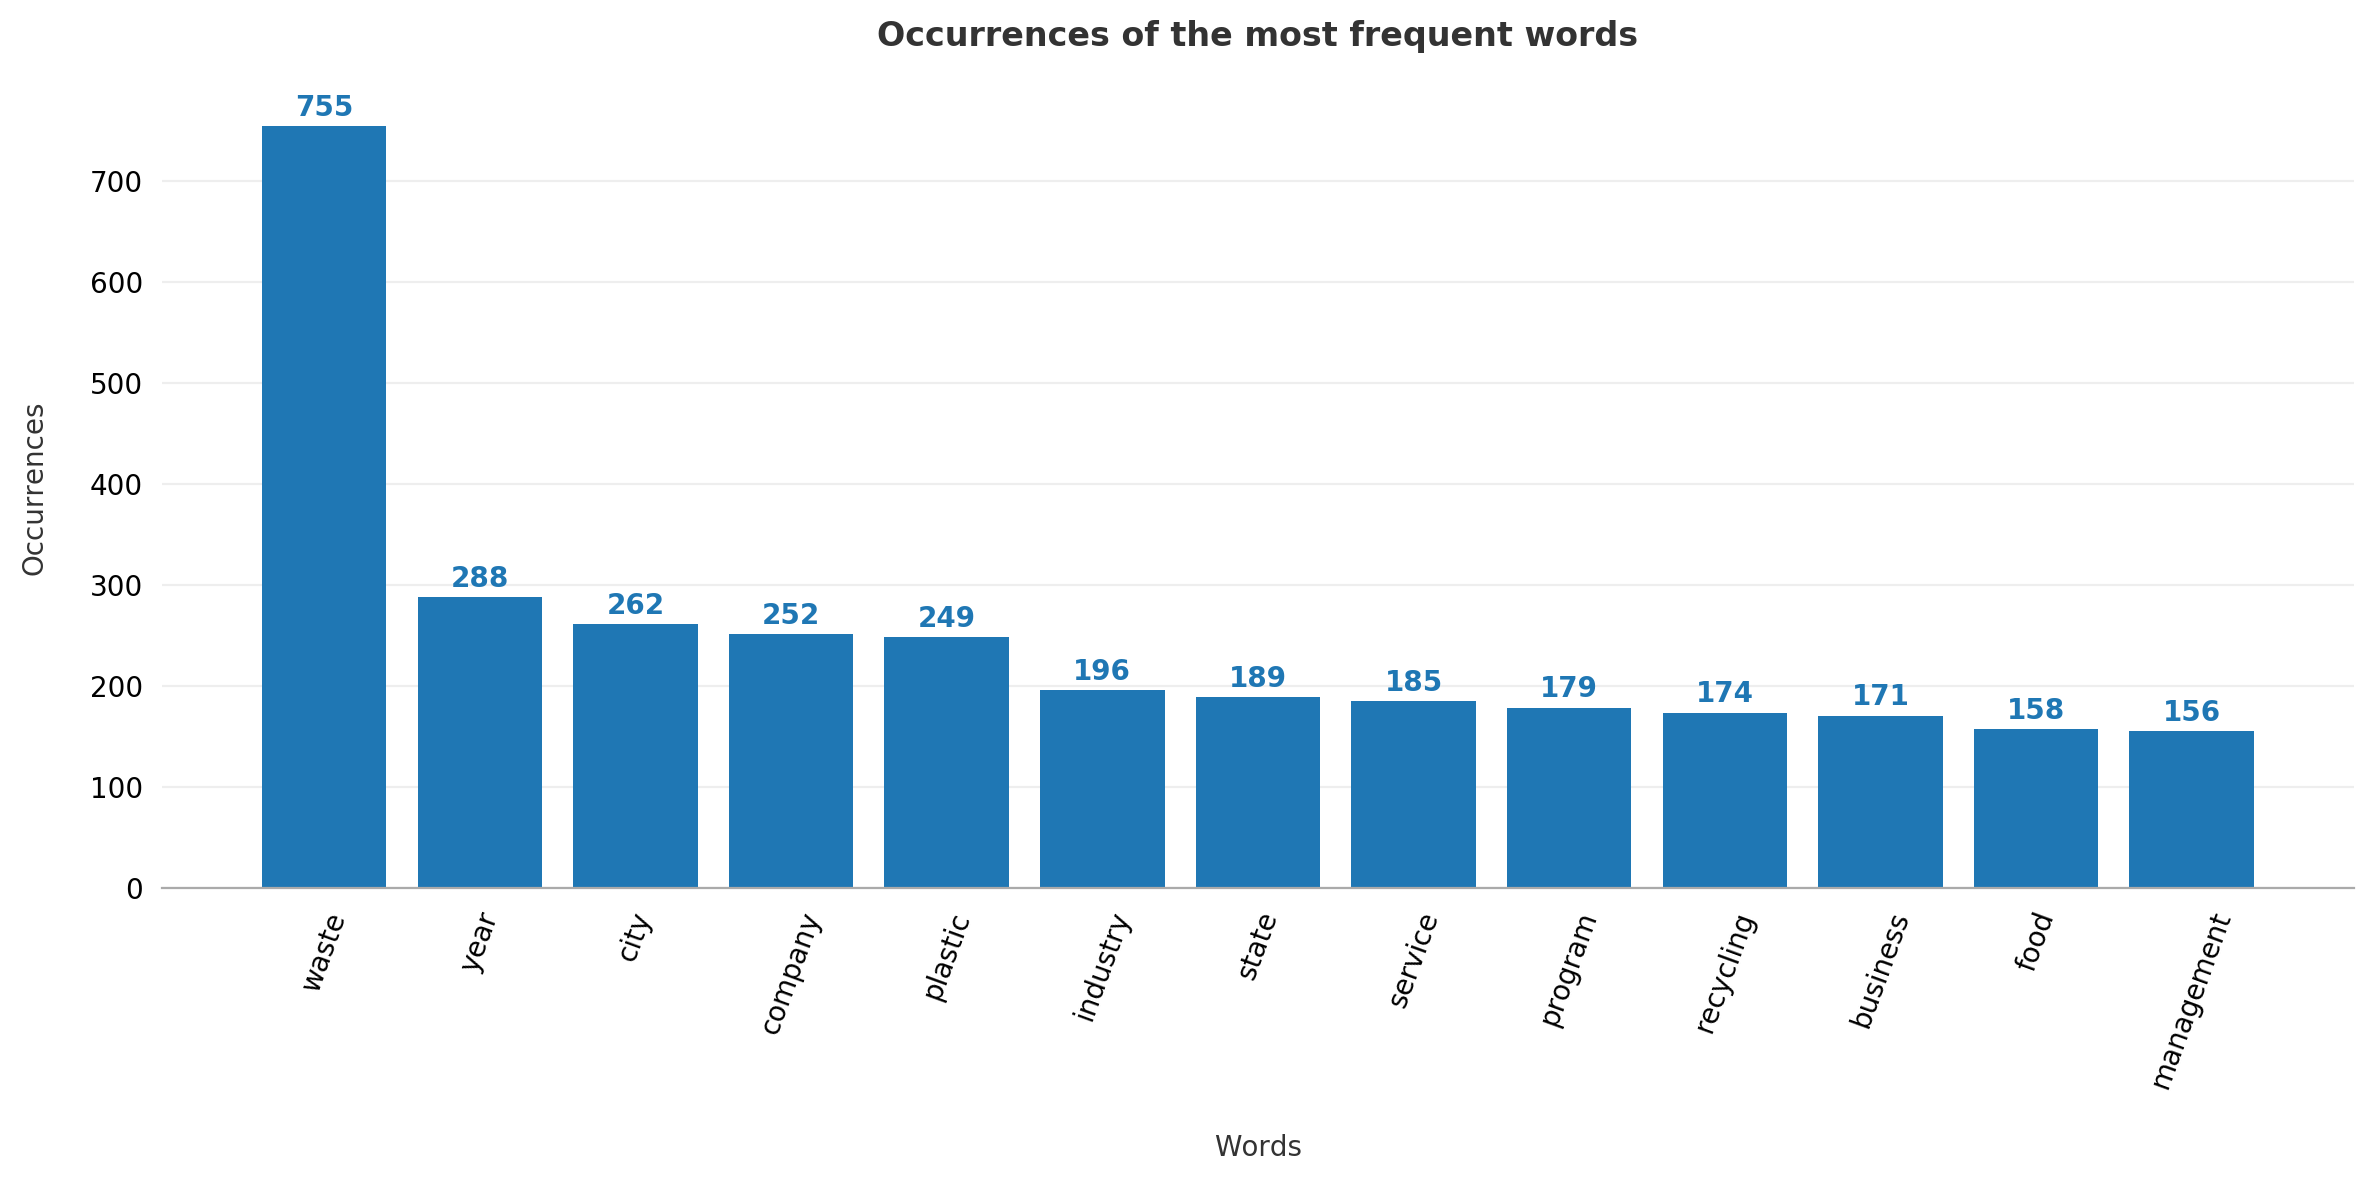

In [274]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(occurrences.size),
    height=occurrences['Occurrences'],
    tick_label=occurrences.index)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#AAAAAA')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 10,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
ax.set_xlabel('Words', labelpad=15, color='#333333')
ax.set_ylabel('Occurrences', labelpad=15, color='#333333')
ax.set_title('Occurrences of the most frequent words', pad=15, color='#333333',
             weight='bold')

plt.xticks(rotation=70)
fig.tight_layout()

Now, we have our graph of the most common words in our summaries. No surprise here, waste is the most important and the other one are also not surprising and even logical because they are all closely related to waste (plastic, industry, city, company, service,...)

## Occurrences of specific categories : with words chosen by myself
Four categories :
- Organic
- Other waste
- Recyclable
- Hazardous

These categories represent the new categories of waste set in Shanghai for the sorting of waste

### Organic

In [276]:
def get_list_nouns(summarylist, listText):
    countlist_organic = []
    for each in listText:
        for i,name in enumerate(summarylist):
            try:
                countlist_organic[i] += name.count(each)
            except IndexError:
                countlist_organic.append(name.count(each))
    return countlist_organic

organic_list = get_list_nouns(summarylist, ['organic', 'fruit', 'food', 'natural', 'vegetables']) #words chosen by myself
print(organic_list[:10])
print(sum(organic_list))
print(len(organic_list))

[1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
271
1200


### Other waste

In [278]:
def get_list_nouns(summarylist, listText):
    countlist_waste= []
    for each in listText:
        for i,name in enumerate(summarylist):
            try:
                countlist_waste[i] += name.count(each)
            except IndexError:
                countlist_waste.append(name.count(each))
    return countlist_waste
    
waste_list = get_list_nouns(summarylist, ['waste', 'trash', 'garbage', 'rubbish'])
print(waste_list [:10])
print(sum(waste_list))
print(len(waste_list))

[0, 2, 2, 0, 0, 0, 1, 0, 0, 1]
988
1200


### Recyclable

In [279]:
def get_list_nouns(summarylist, listText):
    countlist_recyclable= []
    for each in listText:
        for i,name in enumerate(summarylist):
            try:
                countlist_recyclable[i] += name.count(each)
            except IndexError:
                countlist_recyclable.append(name.count(each))
    return countlist_recyclable
    
recyclable_list = get_list_nouns(summarylist, ['plastic', 'glass'])
print(recyclable_list[:10])
print(sum(recyclable_list))
print(len(recyclable_list))

[5, 0, 0, 0, 0, 3, 0, 0, 0, 1]
373
1200


### Hazardous

In [280]:
def get_list_nouns(summarylist, listText):
    countlist_hazardous = []
    for each in listText:
        for i,name in enumerate(summarylist):
            try:
                countlist_hazardous[i] += name.count(each)
            except IndexError:
                countlist_hazardous.append(name.count(each))
    return countlist_hazardous
    
hazardous_list = get_list_nouns(summarylist, ['hazardous', 'dangerous', 'harmful', 'risk', 'electronic'])
print(hazardous_list[:10])
print(sum(hazardous_list))
print(len(hazardous_list))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
101
1200


In [281]:
i = 0
infolist = []
for each in summarylist:
    infolist.append((titlelist[i], summarylist[i], linklist[i], datelist[i], categorylist[i], waste_list[i], organic_list[i], recyclable_list[i], hazardous_list[i]))
    i += 1
infolist[:3]

[('Commentary: Glass Recycling You Should Know: The Most Important Material in the History of Mankind',
  'before the manufacturing process of glass was discovered, the ancient man used naturally occurring glass popularly known as obsidian or volcanic glass. volcanic glass was used to make knives, jewelry, arrowheads and even money. pliny, a roman historian reported that glass was made in first made in syria around 5000bc. in the following three hundred years, […]',
  'https://wasteadvantagemag.com/commentary-glass-recycling-you-should-know-the-most-important-material-in-the-history-of-mankind/',
  'June 28, 2019',
  'Newsletter Headline',
  0,
  1,
  5,
  0),
 ('Pittsburgh, PA Mayor Bill Peduto Proposes Recycling Expansion Plan',
  'pittsburgh mayor bill peduto unveiled plans to provide thousands more blue recycling bins to city residents in an effort to meet zero waste goals. “as the recycling industry and our climate continue to change, pittsburgh needs to keep adapting to a stronge

## Data Frame Python

In [283]:
df = pd.DataFrame(data = infolist)
df.columns = ['Title', 'Summary', 'Link', 'Date', 'Category', 'Other waste occurences', 'Organic occurences', 'Recyclable occurences', 'Hazardous occurences']
df

,Title,Summary,Link,Date,Category,Other waste occurences,Organic occurences,Recyclable occurences,Hazardous occurences
0,Commentary: Glass Recycling You Should Know: T...,before the manufacturing process of glass was ...,https://wasteadvantagemag.com/commentary-glass...,"June 28, 2019",Newsletter Headline,0,1,5,0
1,"Pittsburgh, PA Mayor Bill Peduto Proposes Recy...",pittsburgh mayor bill peduto unveiled plans to...,https://wasteadvantagemag.com/pittsburgh-pa-ma...,"June 28, 2019",Newsletter Headline,2,0,0,0
2,National Trash: Reducing Waste Produced in U.S...,the quantity of waste produced and how park vi...,https://wasteadvantagemag.com/national-trash-r...,"June 28, 2019",Newsletter Headline,2,1,0,0
3,AMP Robotics Announces Largest Deployment of A...,amp robotics corp. (amp) announces the further...,https://wasteadvantagemag.com/amp-robotics-ann...,"June 28, 2019",News and Press,0,0,0,0
4,Lakeshore Recycling Systems Named Fastest Grow...,lakeshore recycling systems (lrs) announces it...,https://wasteadvantagemag.com/lakeshore-recycl...,"June 28, 2019",Collection/Transfer,0,0,0,0
5,California Inches Closer To Banning Sale And M...,california state lawmakers are pursuing phasin...,https://wasteadvantagemag.com/california-inche...,"June 28, 2019",Government and Regulations,0,0,3,0
6,SWANA Supports California Lithium-Ion Battery ...,the solid waste association of north america (...,https://wasteadvantagemag.com/swana-supports-c...,"June 27, 2019",Collection/Transfer,1,0,0,0
7,Plastics Makers Welcome the Introduction of Sa...,the american chemistry council (acc) praised t...,https://wasteadvantagemag.com/plastics-makers-...,"June 27, 2019",Government and Regulations,0,0,0,0
8,National CleanUp Day Announces Return on Septe...,national cleanup dayis a non-profit organizati...,https://wasteadvantagemag.com/national-cleanup...,"June 27, 2019",News and Press,0,0,0,0
9,"Sebastopol, CA Bans Styrofoam Food Containers ...",sebastopol is going ahead with a ban on polyst...,https://wasteadvantagemag.com/sebastopol-ca-ba...,"June 25, 2019",News and Press,1,1,1,0


## Sort the data frame

In [285]:
df.loc[df['Recyclable occurences']>3].sort_values(by = 'Recyclable occurences', ascending=0)

,Title,Summary,Link,Date,Category,Other waste occurences,Organic occurences,Recyclable occurences,Hazardous occurences
0,Commentary: Glass Recycling You Should Know: T...,before the manufacturing process of glass was ...,https://wasteadvantagemag.com/commentary-glass...,"June 28, 2019",Newsletter Headline,0,1,5,0
94,Marine Litter Problem is Solvable With a Littl...,today it’s impossible to imagine modern life w...,https://wasteadvantagemag.com/marine-litter-pr...,"June 12, 2019",Collection/Transfer,1,2,5,0
193,Plastic Waste Management Market is Expected to...,plastic waste management involves various acti...,https://wasteadvantagemag.com/plastic-waste-ma...,"May 28, 2019",Collection/Transfer,5,0,5,0
1013,Leveraging Biodegradation and Composting to D...,governmental incentives and consumer expectati...,https://wasteadvantagemag.com/leveraging-biode...,"December 31, 2018",Compost/Organic Recycling,0,0,5,0
808,"PLASTICS Releases Transportation Report, Explo...","the plastics market watch report, released by ...",https://wasteadvantagemag.com/plastics-release...,"February 12, 2019",Collection/Transfer,0,0,4,0
1091,ISWA Joins a New Collaborative H2020 Project t...,"plastics deliver value through convenient, ver...",https://wasteadvantagemag.com/iswa-joins-a-new...,"December 13, 2018",Newsletter Headline,0,0,4,0
1068,Plastic Bottle Recycling Resilient in Face of ...,plastic bottle recycling declined slightly in ...,https://wasteadvantagemag.com/plastic-bottle-r...,"December 18, 2018",Newsletter Headline,0,0,4,0
920,Project Expands Glass Recycling in Denver,a six-month glass collection pilot project coo...,https://wasteadvantagemag.com/project-expands-...,"January 20, 2019",Newsletter Headline,0,0,4,0
897,Walmart Canada Makes Milestone Commitment to P...,walmart canada announces the walmart canada ch...,https://wasteadvantagemag.com/walmart-canada-m...,"January 24, 2019",Newsletter Headline,2,0,4,0
823,"Expand Connecticut’s Bottle Bill, Reduce Plast...",the amount of plastic produced since 2010 is m...,https://wasteadvantagemag.com/expand-connectic...,"February 7, 2019",Collection/Transfer,0,0,4,0


In [286]:
df.loc[df['Organic occurences']>3].sort_values(by = 'Organic occurences', ascending=0)

,Title,Summary,Link,Date,Category,Other waste occurences,Organic occurences,Recyclable occurences,Hazardous occurences
347,U.S. EPA Honors Food Forward for Leading Food ...,as part of april’s winning on reducing food wa...,https://wasteadvantagemag.com/u-s-epa-honors-f...,"May 1, 2019",Collection/Transfer,2,6,0,0
468,Renewable Natural Gas On-Road Fuel Use Reaches...,natural gas vehicles for america (ngvamerica) ...,https://wasteadvantagemag.com/renewable-natura...,"April 17, 2019",News and Press,2,6,0,0
511,U.S. EPA Honors MGM Resorts’ Bellagio Hotel an...,"last month, mgm resorts international (mgm) wa...",https://wasteadvantagemag.com/u-s-epa-honors-m...,"April 9, 2019",Compost/Organic Recycling,1,5,0,0
26,Hilltopper Refuse & Recycling in Wisconsin Lau...,"brandon knudtson, refuse and recycling coordin...",https://wasteadvantagemag.com/hilltopper-refus...,"June 24, 2019",Collection/Transfer,0,4,0,0
250,How One Atlanta Startup Solved The Biggest Pro...,goodr is a two-year-old startup that provides ...,https://wasteadvantagemag.com/how-one-atlanta-...,"May 17, 2019",Compost/Organic Recycling,3,4,0,0
279,Organic Food Waste Program Could Return in Pri...,"at a community meeting, princeton officials ou...",https://wasteadvantagemag.com/organic-food-was...,"May 13, 2019",Compost/Organic Recycling,2,4,0,0
283,New Laws Aim to Reduce Food Waste in New Jersey,with one in 10 residents in new jersey facing ...,https://wasteadvantagemag.com/new-laws-aim-to-...,"May 13, 2019",Collection/Transfer,2,4,0,0
389,"New Collection Program in Hendersonville, NC C...",henderson county environmental programs and th...,https://wasteadvantagemag.com/new-collection-p...,"April 29, 2019",Compost/Organic Recycling,2,4,0,0
648,New York Lawmakers Move to Tackle Food Waste,the new york state senate included the food do...,https://wasteadvantagemag.com/new-york-lawmake...,"March 17, 2019",Collection/Transfer,1,4,0,0
794,"Nashville, TN’s Mayor’s Food Saver Challenge S...",up to 40 percent of all food in the u.s. is th...,https://wasteadvantagemag.com/nashville-tns-ma...,"February 14, 2019",Compost/Organic Recycling,2,4,0,0


## Excel file creation

In [287]:
df.to_excel('DataFrameWasteAdvantageMag.xlsx')
#df['Waste occurences'].plot

### Recover article which has the most organic occurrences in its summary

In [288]:
tab_ord = df.loc[df['Organic occurences']>3].sort_values(by = 'Organic occurences', ascending=0)
print(list(tab_ord['Link'])[0])

https://wasteadvantagemag.com/u-s-epa-honors-food-forward-for-leading-food-recovery-efforts-nationwide/


In [289]:
source = requests.get(list(tab_ord['Link'])[0]).text
soup = BeautifulSoup(source, 'html5lib')

In [290]:
article = soup.find_all('div', 'post-content')
article

[<div class="post-content"><p>As part of April’s Winning on Reducing Food Waste Month, the U.S. Environmental Protection Agency (EPA) recognized Food Forward for its outstanding efforts in food recovery. This is the fourth Food Recovery Challenge award received by the nonprofit organization. Food Forward fights hunger and prevents food waste by rescuing fresh, surplus produce and connecting it to those in need via local hunger relief agencies. These nutritious fresh fruits and vegetables come from over 730 backyards, farms, and orchards; 283 farmers at 24 weekly farmers markets; and over 170 wholesale produce vendors.</p><p>“Food Forward is making surplus fresh produce available to people in need,” said <strong>E</strong>PA Pacific Southwest Regional Administrator Mike Stoker. “I’m pleased to recognize this organization’s leaders and the many volunteers and donors who make this possible.”</p><p>“Our volunteers stand on the front lines and distribute healthy, nutritious produce to our r

Thanks to the link you are now able to find the article which is supposed to be the most linked with organic waste for example

We have also the html of this article and we could have done the same job as before with articles rather than summaries

# Topic modeling
## Word2Vec
Word2vec is a group of related models that are used to produce word embeddings. Word2vec produces one vector per word. It helps in identifying content and subsets of content.
## TF-IDF
TFIDF is short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.It is often used as user modeling. TFIDF produces a score. TFIDF is a way to judge the topic of an article. This is done by the kind of words it contains. Here words are given weight so it measures relevance, not frequency.

In [291]:
summarylist[0]

'before the manufacturing process of glass was discovered, the ancient man used naturally occurring glass popularly known as obsidian or volcanic glass. volcanic glass was used to make knives, jewelry, arrowheads and even money. pliny, a roman historian reported that glass was made in first made in syria around 5000bc. in the following three hundred years, […]'

## Creation of training set (2/3 of the data set)

In [292]:
a = int(round(2/3*len(new_list_clean)))
a

797

In [293]:
training_list = new_list_clean[:a]
print(training_list[:5])
len(training_list)

[['manufacturing', 'process', 'glass', 'ancient', 'man', 'glass', 'glass', 'glass', 'knife', 'jewelry', 'arrowhead', 'money', 'pliny', 'roman', 'historian', 'glass', 'syria', 'year'], ['pittsburgh', 'mayor', 'bill', 'peduto', 'plan', 'thousand', 'bin', 'city', 'resident', 'effort', 'waste', 'goal', 'recycling', 'industry', 'climate', 'continue', 'need', 'culture', 'waste', 'reduction', 'material', 'reuse', 'mayor', 'peduto', 'plan'], ['quantity', 'waste', 'visitor', 'material', 'concern', 'park', 'manager', 'waste', 'cost', 'money', 'effort', 'resource', 'tax', 'park', 'extreme', 'number', 'visitor', 'manager', 'strategy'], ['robotics', 'corp.', 'amp', 'expansion', 'robot', 'msw', 'stream', 'recyclers', 'ssr', 'unveiling', 'installation', 'system', 'mrf', 'florida', 'kind', 'state', 'ssr', 'system', 'sr'], ['system', 'lr', 'company', 'crain', 'announcement', 'friday', 'june', 'crain', 'award', 'luncheon', 'ranking', 'region', 'company', 'business', 'strategy', 'revenue', 'growth', 'lak

797

## Word2Vec

### First method

In [294]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim

In [295]:
from gensim.models import Word2Vec

In [296]:
model_word2vec = Word2Vec(training_list, min_count=10, size = 100) #fréquence minimale du mot 2
#print word2vec

In [297]:
vocabulary = model_word2vec.wv.vocab  
#print(vocabulary) 

In [298]:
v1 = model_word2vec.wv['waste']
v1

array([-0.26038668,  0.1911383 , -0.29618204, -0.02289086, -0.31621405,
       -0.26550743,  0.6048535 ,  0.10413208,  0.22002554,  0.29239684,
        0.4325419 , -0.01053236, -0.01876423,  0.21120746,  0.12143701,
        0.06699383, -0.40918618,  0.18385   , -0.00825366, -0.02545707,
       -0.48562935,  0.16709544,  0.3483704 ,  0.54433686, -0.8427438 ,
       -0.1686021 ,  0.27796793,  0.19719385, -0.00746597,  0.09407046,
       -0.08182582, -0.18190578, -0.22154398, -0.04098717,  0.02822359,
       -0.1875755 ,  0.5741977 , -0.25424185, -0.38717553,  0.21431895,
       -0.15232566,  0.54967296, -0.13182229,  0.04942046, -0.01511368,
       -0.00740521, -0.0986443 ,  0.15099363,  0.09876258,  0.08619151,
       -0.17325892, -0.02560397, -0.5370953 , -0.04561631, -0.11664075,
        0.09366732,  0.57669526, -0.3323497 ,  0.12301074,  0.02785341,
       -0.10338937,  0.41497922,  0.18721586,  0.0939301 ,  0.5039587 ,
       -0.08673202, -0.35867625,  0.24313022,  0.26335073,  0.15

In [299]:
sim_words_waste = model_word2vec.wv.most_similar('waste')
sim_words_waste

[('state', 0.9998778104782104),
 ('plastic', 0.9998694658279419),
 ('year', 0.9998670220375061),
 ('city', 0.9998655915260315),
 ('industry', 0.9998654127120972),
 ('material', 0.9998488426208496),
 ('recycling', 0.9998461008071899),
 ('company', 0.9998372197151184),
 ('program', 0.9998361468315125),
 ('business', 0.9998353123664856)]

In [303]:
sim_words_organic = model_word2vec.wv.most_similar('food')
sim_words_organic

[('waste', 0.999830961227417),
 ('year', 0.9998257756233215),
 ('plastic', 0.999812126159668),
 ('state', 0.9998049736022949),
 ('business', 0.999786376953125),
 ('goal', 0.9997808337211609),
 ('company', 0.9997789263725281),
 ('material', 0.9997754096984863),
 ('industry', 0.9997743964195251),
 ('program', 0.9997743368148804)]

In [304]:
sim_words_recyclable = model_word2vec.wv.most_similar(['plastic', 'glass'])
sim_words_recyclable

[('city', 0.9998202323913574),
 ('company', 0.9998197555541992),
 ('state', 0.9998080730438232),
 ('year', 0.9998038411140442),
 ('waste', 0.9998026490211487),
 ('recycling', 0.9997972249984741),
 ('program', 0.9997954368591309),
 ('county', 0.9997928142547607),
 ('industry', 0.9997920989990234),
 ('award', 0.999770998954773)]

In [307]:
# sim_words_hazardous = model_word2vec.wv.most_similar(['hazardous'])
# sim_words_hazardous

Now we can see that according to Word2Vec, the most similar words of waste seem to be plastic, year, state, city... We can notice that there are words like plastic which are kinds of waste and other which more refered to places or time.

In [200]:
sim_words1 = model_word2vec.wv.most_similar(['plastic', 'waste'])
sim_words1

[('facility', 0.2582968771457672),
 ('state', 0.2159246951341629),
 ('packaging', 0.18899592757225037),
 ('sale', 0.18335336446762085),
 ('food', 0.1759570837020874),
 ('recovery', 0.14497309923171997),
 ('service', 0.14000041782855988),
 ('company', 0.13316810131072998),
 ('vehicle', 0.1324111372232437),
 ('center', 0.11635396629571915)]

Just to show the most similar words of plastic and waste

## Conclusion

Now thanks to Word2Vec we can clearly see the words which are the closest of one (ie: waste or food = organic)
That is a good progress but it is not really visual. A graph could be a good improvement. Let's make a graph on Gephi ! 

## Graph on Gephi

In [308]:
import networkx as nx

In [309]:
graph = nx.Graph()

In [310]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



In [311]:
graph.add_nodes_from(list(model_word2vec.wv.vocab))

In [312]:
for each in model_word2vec.wv.vocab:
    for i in model_word2vec.wv.most_similar(each):
        graph.add_edge(each, i[0], weight = i[1])

In [313]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 303
Number of edges: 2955
Average degree:  19.5050


In [314]:
nx.write_gexf(graph, 'graph_final.gexf')

In [ ]:
On this graph we can see that we have eight categorirues
some groups
most important words on the sides of the graph
xx nodes and xx edges (weight are roughly the same (cause of the numerous data))

# Analyse word frequences thanks to machine learning

## Bag of words

In [323]:
dictionnary = gensim.corpora.Dictionary(new_list_clean)
print(len(dictionnary))
print(dictionnary)

4557
Dictionary(4557 unique tokens: ['ancient', 'arrowhead', 'glass', 'historian', 'jewelry']...)


In [330]:
dictionnary.filter_extremes(no_below=20, no_above=0.3) #remove words that appear in less than 10 articles and also in more than 30% of all articles
print (dictionnary)

Dictionary(185 unique tokens: ['glass', 'manufacturing', 'process', 'year', 'bill']...)


In [331]:
bow_corpus = [dictionnary.doc2bow(word) for word in training_list]
print(bow_corpus[:10])
#print(sum([len(each) for each in bow_corpus]))

[[(0, 5), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1)], [(7, 1), (10, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 2)], [(20, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1)], [(12, 1), (14, 1), (22, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1)], [(11, 1), (22, 1), (31, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1)], [(7, 1), (42, 1), (43, 1)], [(3, 1), (4, 1), (6, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(34, 1), (36, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1)]]


In [332]:
print(training_list[0])
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], dictionnary[bow_doc_0[i][0]], bow_doc_0[i][1]))

['manufacturing', 'process', 'glass', 'ancient', 'man', 'glass', 'glass', 'glass', 'knife', 'jewelry', 'arrowhead', 'money', 'pliny', 'roman', 'historian', 'glass', 'syria', 'year']
Word 0 ("glass") appears 5 time.
Word 1 ("manufacturing") appears 1 time.
Word 2 ("process") appears 1 time.
Word 3 ("year") appears 1 time.


## TF - IDF

In [333]:
from gensim import corpora, models

In [334]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [335]:
list_words_tfidf = []
for doc in corpus_tfidf:
    for each in doc:
        list_words_tfidf.append((dictionnary[each[0]], each[1]))
list_words_tfidf = sorted(list_words_tfidf, key=lambda w: w[1], reverse=True)
pprint(list_words_tfidf[:10])
print('\n')
pprint(list_words_tfidf[-10:])

[('people', 1.0),
 ('investment', 1.0),
 ('plastic', 1.0),
 ('garbage', 1.0),
 ('recycling', 1.0),
 ('driver', 1.0),
 ('glass', 0.9696611127565707),
 ('glass', 0.9636619308326577),
 ('truck', 0.9612646886216839),
 ('addition', 0.9287991345616747)]


[('company', 0.10173638024919814),
 ('state', 0.10076094705643197),
 ('year', 0.09793135980562251),
 ('year', 0.09502924269949271),
 ('year', 0.09367494200370471),
 ('year', 0.09121473069139735),
 ('year', 0.08994090165392049),
 ('year', 0.08654507486268753),
 ('year', 0.08240759178736388),
 ('year', 0.0742061876005869)]


Thanks to TFIDF we can see that people, plastic, garbage, recycling or car have high scores (each word in a document is associated to a number that is proportional to its frequency in the document and inversely proportional to the number of documents in which it occurs). 
But we can see that inversly year has a bad score. It could be removed by decreasing the value of no_above.
We have our TFIDF scores and we are now able to create our LDA models. Firstly with bag of words and secondly with TFIDF.

## LDA Models

### With bag of words

In [336]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionnary, passes=5)

In [337]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

Topic: 0 
Words: 0.039*"food" + 0.032*"company" + 0.030*"initiative" + 0.030*"plan" + 0.030*"management" + 0.027*"program" + 0.026*"effort" + 0.026*"scrap" + 0.025*"member" + 0.024*"organization"

Topic: 1 
Words: 0.085*"bill" + 0.084*"state" + 0.046*"food" + 0.036*"container" + 0.033*"legislation" + 0.031*"california" + 0.025*"law" + 0.025*"agency" + 0.023*"house" + 0.022*"year"

Topic: 2 
Words: 0.108*"service" + 0.076*"company" + 0.059*"business" + 0.049*"customer" + 0.026*"disposal" + 0.025*"announces" + 0.025*"president" + 0.018*"management" + 0.017*"area" + 0.017*"market"

Topic: 3 
Words: 0.102*"year" + 0.041*"award" + 0.040*"safety" + 0.038*"glass" + 0.030*"market" + 0.027*"vehicle" + 0.021*"industry" + 0.020*"development" + 0.019*"gas" + 0.016*"sale"

Topic: 4 
Words: 0.182*"plastic" + 0.051*"bag" + 0.048*"energy" + 0.046*"state" + 0.025*"county" + 0.024*"recycling" + 0.019*"department" + 0.018*"country" + 0.017*"protection" + 0.017*"percent"

Topic: 5 
Words: 0.099*"food" + 0

### With TF - IDF

In [338]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionnary, passes=5)

In [339]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWord: {}\n'.format(idx, topic))

Topic: 0 
Word: 0.077*"safety" + 0.065*"driver" + 0.058*"vehicle" + 0.051*"truck" + 0.046*"garbage" + 0.030*"technology" + 0.021*"equipment" + 0.021*"year" + 0.020*"leader" + 0.018*"industry"

Topic: 1 
Word: 0.029*"product" + 0.028*"solution" + 0.021*"agency" + 0.021*"landfill" + 0.019*"county" + 0.019*"award" + 0.017*"grant" + 0.016*"program" + 0.016*"organization" + 0.016*"recycling"

Topic: 2 
Word: 0.047*"food" + 0.030*"day" + 0.029*"industry" + 0.023*"percent" + 0.022*"state" + 0.021*"scrap" + 0.020*"center" + 0.020*"facility" + 0.019*"item" + 0.016*"association"

Topic: 3 
Word: 0.041*"sale" + 0.035*"president" + 0.033*"curbside" + 0.027*"glass" + 0.026*"officer" + 0.026*"vice" + 0.026*"experience" + 0.024*"collection" + 0.024*"manager" + 0.022*"recycling"

Topic: 4 
Word: 0.067*"city" + 0.031*"council" + 0.028*"trash" + 0.028*"business" + 0.023*"service" + 0.022*"landfill" + 0.020*"way" + 0.020*"department" + 0.020*"program" + 0.020*"rate"

Topic: 5 
Word: 0.028*"energy" + 0.02

## Predictions for the other articles (with test_list)

In [340]:
test_list = new_list_clean[a:]
print(len(test_list))
print(test_list[0:10])

398
[['tealinc', 'offer', 'industry', 'scholarship', 'application', 'forsyth', 'tealinc', 'ltd.', 'railcar', 'operating', 'lessor', 'transportation', 'manager', 'rail', 'transportation', 'consultant', 'railcar', 'broker', 'application', 'scholarship', 'program', 'program', 'scholarship', 'candidate', 'scholarship'], ['series', 'mind', 'matter', 'spirit', 'artist', 'suzanne', 'jongman', 'model', 'pose', 'period', 'costume', 'material', 'foam', 'wrap', 'jar', 'lid', 'jongmans', 'act', 'something', 'nothing', 'change', 'way', 'reality', 'person', 'trash'], ['american', 'ton', 'glass', 'trash', 'material', 'property', 'glass', 'glass', 'weisenburger', 'lipetz', 'director', 'glass', 'manufacturing', 'industry', 'council'], ['food', 'waste', 'digester', 'public', 'thursday', 'house', 'center', 'food', 'waste', 'energy', 'resource', 'recovery', 'partnership', 'energy', 'water', 'district', 'ton', 'food', 'waste'], ['people', 'recycling', 'garbage', 'transfer', 'station', 'resident', 'business

## Predictions with Bag of Words

In [341]:
article_topics = []
for i in range(0,len(test_list)):
        test_corpus = dictionnary.doc2bow(test_list[i])
        proba = lda_model.get_document_topics(test_corpus)
        article_topics.append([ str(i), str(max(proba, key = lambda w:w[1])[0])])

prediction_list = sorted(article_topics, key=lambda w:w[0])
print(type(prediction_list[0][1]))
prediction_list[0:10]

<class 'str'>


[['0', '6'],
 ['1', '9'],
 ['10', '9'],
 ['100', '7'],
 ['101', '1'],
 ['102', '6'],
 ['103', '0'],
 ['104', '7'],
 ['105', '7'],
 ['106', '3']]

In [342]:
for e in range(len(prediction_list)):
    for p in range(len(prediction_list[e])):
        prediction_list[e][p] = int(prediction_list[e][p])
prediction_list_1 = sorted(prediction_list)
print(prediction_list_1[0:10])

[[0, 6], [1, 9], [2, 3], [3, 5], [4, 9], [5, 9], [6, 1], [7, 8], [8, 3], [9, 7]]


In [343]:
prediction_list_2 = []
for each in prediction_list_1:
    #print(each)
    for i in each:    
        prediction_list_2.append(i)
print(prediction_list_2[0:10])

prediction_list_3 = []
for i in reversed(prediction_list_2):
    prediction_list_3.append(i)
prediction_list_3

prediction_list_4 = prediction_list_3[::2]
print(prediction_list_4[-10:])

prediction_list_5 = []
for i in reversed(prediction_list_4):
    prediction_list_5.append(i)
print(prediction_list_5[:20])

[0, 6, 1, 9, 2, 3, 3, 5, 4, 9]
[7, 3, 8, 1, 9, 9, 5, 3, 9, 6]
[6, 9, 3, 5, 9, 9, 1, 8, 3, 7, 9, 7, 2, 3, 4, 5, 9, 4, 8, 3]


In [344]:
i = 0
final_list_bagofwords = []
for each in prediction_list_1:
    final_list_bagofwords.append((titlelist[i+a], prediction_list_5[i], linklist[i+a]))
    i += 1
final_list_bagofwords[:3]

[('EPA Acting Administrator Announces First-Ever Comprehensive Nationwide PFAS Action Plan',
  6,
  'https://wasteadvantagemag.com/epa-acting-administrator-announces-first-ever-comprehensive-nationwide-pfas-action-plan/'),
 ('Amazon’s Streamlined Plastic Packaging is Jamming Up Recycling Centers',
  9,
  'https://wasteadvantagemag.com/amazons-streamlined-plastic-packaging-is-jamming-up-recycling-centers/'),
 ('Plastics Industry Association Launches Search for Next President and CEO',
  3,
  'https://wasteadvantagemag.com/plastics-industry-association-launches-search-for-next-president-and-ceo/')]

In [345]:
df = pd.DataFrame(data = final_list_bagofwords)
df.columns = ['Title', 'Topic', 'Link']
df

,Title,Topic,Link
0,EPA Acting Administrator Announces First-Ever ...,6,https://wasteadvantagemag.com/epa-acting-admin...
1,Amazon’s Streamlined Plastic Packaging is Jamm...,9,https://wasteadvantagemag.com/amazons-streamli...
2,Plastics Industry Association Launches Search ...,3,https://wasteadvantagemag.com/plastics-industr...
3,Tealinc Offers Industry Scholarship,5,https://wasteadvantagemag.com/tealinc-offers-i...
4,Recycled Plastic Gets a Second Life in Renaiss...,9,https://wasteadvantagemag.com/recycled-plastic...
5,Why Glass Recycling in the U.S. is Broken,9,https://wasteadvantagemag.com/why-glass-recycl...
6,New Utah Facility Will Turn Food Waste Into Re...,1,https://wasteadvantagemag.com/new-utah-facilit...
7,King County’s Solid Waste Division Invites Com...,8,https://wasteadvantagemag.com/king-countys-sol...
8,NWRA Urges Baltimore City to Reconsider Air Qu...,3,https://wasteadvantagemag.com/nwra-urges-balti...
9,Waste Pro Looks Within to Address National Dri...,7,https://wasteadvantagemag.com/waste-pro-looks-...


## Prediction with TFIDF

In [346]:
article_topics = []
for i in range(0,len(test_list)):
        test_corpus = dictionnary.doc2bow(test_list[i])
        proba = lda_model_tfidf.get_document_topics(test_corpus)
        article_topics.append([ str(i), str(max(proba, key = lambda w:w[1])[0])])
print(type(prediction_list[0][1]))
prediction_list = sorted(article_topics, key=lambda w:w[0])
prediction_list[0:10]

<class 'int'>


[['0', '1'],
 ['1', '4'],
 ['10', '8'],
 ['100', '1'],
 ['101', '2'],
 ['102', '4'],
 ['103', '9'],
 ['104', '6'],
 ['105', '5'],
 ['106', '2']]

In [347]:
for e in range(len(prediction_list)):
    for p in range(len(prediction_list[e])):
        prediction_list[e][p] = int(prediction_list[e][p])
prediction_list_release = sorted(prediction_list)
print(prediction_list_release[0:10])

[[0, 1], [1, 4], [2, 3], [3, 2], [4, 4], [5, 4], [6, 0], [7, 5], [8, 6], [9, 0]]


In [348]:
prediction_list_release1 = []
for each in prediction_list_release:
    #print(each)
    for i in each:    
        prediction_list_release1.append(i)
print(prediction_list_release1[0:10])

prediction_list_release2 = []
for i in reversed(prediction_list_release1):
    prediction_list_release2.append(i)
prediction_list_release2

prediction_list_release3 = prediction_list_release2[::2]
print(prediction_list_release3[-10:])

prediction_list_release4 = []
for i in reversed(prediction_list_release3):
    prediction_list_release4.append(i)
print(prediction_list_release4[:20])

[0, 1, 1, 4, 2, 3, 3, 2, 4, 4]
[0, 6, 5, 0, 4, 4, 2, 3, 4, 1]
[1, 4, 3, 2, 4, 4, 0, 5, 6, 0, 8, 2, 5, 1, 9, 1, 7, 9, 5, 0]


In [349]:
i = 0
final_list_tfidf = []
for each in prediction_list_release:
    final_list_tfidf.append((titlelist[i+a], prediction_list_release4[i], linklist[i+a]))
    i += 1
final_list_tfidf[:3]

[('EPA Acting Administrator Announces First-Ever Comprehensive Nationwide PFAS Action Plan',
  1,
  'https://wasteadvantagemag.com/epa-acting-administrator-announces-first-ever-comprehensive-nationwide-pfas-action-plan/'),
 ('Amazon’s Streamlined Plastic Packaging is Jamming Up Recycling Centers',
  4,
  'https://wasteadvantagemag.com/amazons-streamlined-plastic-packaging-is-jamming-up-recycling-centers/'),
 ('Plastics Industry Association Launches Search for Next President and CEO',
  3,
  'https://wasteadvantagemag.com/plastics-industry-association-launches-search-for-next-president-and-ceo/')]

In [350]:
df = pd.DataFrame(data = final_list_tfidf)
df.columns = ['Title', 'Topic', 'Link']
df[0:10]

,Title,Topic,Link
0,EPA Acting Administrator Announces First-Ever ...,1,https://wasteadvantagemag.com/epa-acting-admin...
1,Amazon’s Streamlined Plastic Packaging is Jamm...,4,https://wasteadvantagemag.com/amazons-streamli...
2,Plastics Industry Association Launches Search ...,3,https://wasteadvantagemag.com/plastics-industr...
3,Tealinc Offers Industry Scholarship,2,https://wasteadvantagemag.com/tealinc-offers-i...
4,Recycled Plastic Gets a Second Life in Renaiss...,4,https://wasteadvantagemag.com/recycled-plastic...
5,Why Glass Recycling in the U.S. is Broken,4,https://wasteadvantagemag.com/why-glass-recycl...
6,New Utah Facility Will Turn Food Waste Into Re...,0,https://wasteadvantagemag.com/new-utah-facilit...
7,King County’s Solid Waste Division Invites Com...,5,https://wasteadvantagemag.com/king-countys-sol...
8,NWRA Urges Baltimore City to Reconsider Air Qu...,6,https://wasteadvantagemag.com/nwra-urges-balti...
9,Waste Pro Looks Within to Address National Dri...,0,https://wasteadvantagemag.com/waste-pro-looks-...


In [351]:
df.sort_values(by = 'Topic', ascending=True)[0:10]

,Title,Topic,Link
262,U.S. EPA Recognizes Food Recovery Efforts in C...,0,https://wasteadvantagemag.com/u-s-epa-recogniz...
66,"Get to Know: Brenda A. Haney, P.E.",0,https://wasteadvantagemag.com/brenda-a-haney-p-e/
38,A Chair Made from Ocean Waste Hints at the Fur...,0,https://wasteadvantagemag.com/a-chair-made-fro...
168,City of Cheyenne Selects Burns & McDonnell to ...,0,https://wasteadvantagemag.com/city-of-cheyenne...
366,Learning from Others,0,https://wasteadvantagemag.com/learning-from-ot...
365,Gloves Receive ‘Back of the Hand’ Treatment,0,https://wasteadvantagemag.com/gloves-receive-b...
143,Bucks Fabricating Celebrates 35 Years of Business,0,https://wasteadvantagemag.com/bucks-fabricatin...
9,Waste Pro Looks Within to Address National Dri...,0,https://wasteadvantagemag.com/waste-pro-looks-...
68,Maintenance: Improve Asset Efficiency with Pre...,0,https://wasteadvantagemag.com/maintenance-impr...
6,New Utah Facility Will Turn Food Waste Into Re...,0,https://wasteadvantagemag.com/new-utah-facilit...


In [352]:
df.to_excel('DataFrameTopic.xlsx')

### Conclusion

We have now our LDA model and thanks to them we can predict our article will be more associated to one or another topic! It easy so helpful to know that before reading the article beacuse it allows you to choose an article before reading it just by choosing which topic is the most interesting in your opinion and find the right one! You have also the link on the excel file in order to access easier the webpage!

We could see that the 2 LDA models are a bit different but it is absolutely normal because it depends on the corpus used.

Thanks to this study we learnt that :
- Other waste seems to be the most reccurent category before recyclable in waste articles
- Plastic (waste) is the word refered to a category of waste which the most used in these articles
- Waste / recycling and the other most important words are all in the center of our gephi graph (seems logical) and create 6 classes!